# Predicting diamond price

# Exploring data

In [0]:
#import the basic Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
data = pd.read_csv("diamonds.csv")
plt.style.use('ggplot')

In [2]:
data.head(20)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [0]:
# we note there is column(Unnamed:0) unusefull
data.drop(data.columns[0],axis=1,inplace=True)

In [4]:
data.head(20)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
print(data.cut.value_counts())
print('----------------------------------')
print(data.color.value_counts())
print('----------------------------------')
print(data.clarity.value_counts())

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64
----------------------------------
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64
----------------------------------
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64


# **Visualization**

/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


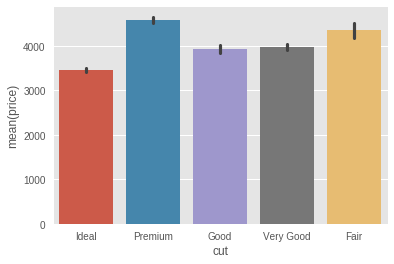

In [8]:
a=sns.barplot(data.cut, data.price)


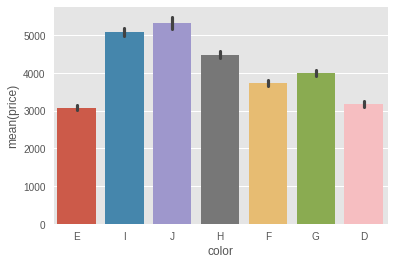

In [9]:
a=sns.barplot(data.color,data.price)

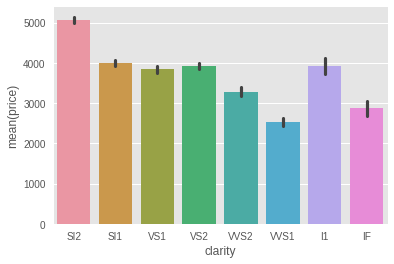

In [10]:
a=sns.barplot(data.clarity,data.price)

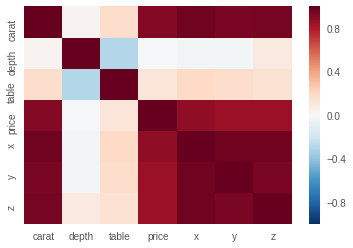

In [11]:
a=data.corr()
a=sns.heatmap(a)

# Pre-processing and Feature Engineering
 #### we can note :
 * we have 3 category columns(cut ,color and clarity) 
 * x,y,z have zero value and that illogical

In [12]:
#the rows have zero value in x or y or z
print(data.loc[data['x']==0])
print("------------------------")
print(data.loc[data['y']==0])
print('------------------------')
print(data.loc[data['z']==0])

       carat        cut color clarity  depth  table  price    x     y    z
11182   1.07      Ideal     F     SI2   61.6   56.0   4954  0.0  6.62  0.0
11963   1.00  Very Good     H     VS2   63.3   53.0   5139  0.0  0.00  0.0
15951   1.14       Fair     G     VS1   57.5   67.0   6381  0.0  0.00  0.0
24520   1.56      Ideal     G     VS2   62.2   54.0  12800  0.0  0.00  0.0
26243   1.20    Premium     D    VVS1   62.1   59.0  15686  0.0  0.00  0.0
27429   2.25    Premium     H     SI2   62.8   59.0  18034  0.0  0.00  0.0
49556   0.71       Good     F     SI2   64.1   60.0   2130  0.0  0.00  0.0
49557   0.71       Good     F     SI2   64.1   60.0   2130  0.0  0.00  0.0
------------------------
       carat        cut color clarity  depth  table  price    x    y    z
11963   1.00  Very Good     H     VS2   63.3   53.0   5139  0.0  0.0  0.0
15951   1.14       Fair     G     VS1   57.5   67.0   6381  0.0  0.0  0.0
24520   1.56      Ideal     G     VS2   62.2   54.0  12800  0.0  0.0  0.0
2624

In [0]:
# we don't used  the row of the zero value of x or y or z
data=data.loc[(data['x']!=0)&(data['y']!=0)&(data['z']!=0.0)]

In [0]:
#convert all categorical into numerical
data['cut'].replace(['Ideal','Premium','Very Good','Good','Fair'],[1,2,3,4,5],inplace=True)
data['color'].replace(['J','I','H','D','G','F','E'],[1,2,3,4,5,6,7],inplace=True)
data['clarity'].replace(['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'],[1,2,3,4,5,6,7,8],inplace=True)

In [15]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,1,7,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,2,7,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,4,7,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,2,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,4,1,2,63.3,58.0,335,4.34,4.35,2.75


# models

In [0]:
# import sklearn to split data and StandardScaler to Data transformation with held out data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [45]:

# split data
X_train,X_test,y_train,y_test=train_test_split(data.drop(['price'],axis=1),data['price'],test_size=0.20,random_state=10)
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)
print('Number of rows in the total set: {}'.format(data.shape))
print('Number of rows in the training set: {}'.format(X_train.shape))
print('Number of rows in the test set: {}'.format(X_test.shape))

Number of rows in the total set: (53920, 10)
Number of rows in the training set: (43136, 9)
Number of rows in the test set: (10784, 9)


# Models
## Training and Evaluation
    

# 1-Naive Bayes
     Benchmark Model

In [0]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train_scaled,y_train).predict(X_test_scaled)

In [47]:
print('r2_score:',r2_score(y_test,y_pred))
print('mean square error: ', mean_squared_error(y_test,y_pred))

('r2_score:', 0.8747099357220705)
('mean square error: ', 2059994.3889094954)


## **2-LinearRegression Model**

In [0]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
y2_pred=LR.fit(X_train_scaled,y_train).predict(X_test_scaled)

In [49]:
print('r2_score:',r2_score(y_test,y2_pred))
print('mean square error:', mean_squared_error(y_test,y2_pred))

('r2_score:', 0.902853789970007)
('mean square error:', 1597258.7189490432)


## **3- DecisionTrees Model **

In [0]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
y3_pred=regressor.fit(X_train_scaled,y_train).predict(X_test_scaled)

In [51]:
print('r2_score:',r2_score(y_test,y3_pred))
print('mean square error: ', mean_squared_error(y_test,y3_pred))

('r2_score:', 0.9655994693159025)
('mean square error: ', 565606.703078635)


## **4- Random Forest Model **

In [0]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor()
y4_pred=rfg.fit(X_train_scaled,y_train).predict(X_test_scaled)

In [53]:
print('r2_score:',r2_score(y_test,y4_pred))
print('mean square error: ', mean_squared_error(y_test,y4_pred))

('r2_score:', 0.9808131435311431)
('mean square error: ', 315466.4888588423)


# **Cross Validation**

In [54]:
from sklearn.model_selection import cross_val_score
print("-------R2-------")
print("NaiveBayes:",np.mean(cross_val_score(gnb,X_train_scaled,y_train,cv = 10)))
print("LinearRegression:",np.mean(cross_val_score(LR,X_train_scaled,y_train,cv = 10)))
print("DecisionTrees:",np.mean(cross_val_score(regressor,X_train_scaled,y_train,cv = 10)))
print("RandomForest:",np.mean(cross_val_score(rfg,X_train_scaled,y_train,cv = 10)))

-------R2-------
('NaiveBayes:', 0.013515326940720811)
('LinearRegression:', 0.8921939236266118)
('DecisionTrees:', 0.9651462536235369)
('RandomForest:', 0.9789689546970992)


In [55]:
print("------MSR------")
print("NaiveBayes:",np.mean(cross_val_score(gnb,X_train_scaled,y_train,scoring='neg_mean_squared_error',cv = 10)))
print("LinearRegression:",np.mean(cross_val_score(LR,X_train_scaled,y_train,scoring='neg_mean_squared_error',cv = 10)))
print("DecisionTrees:",np.mean(cross_val_score(regressor,X_train_scaled,y_train,scoring='neg_mean_squared_error',cv = 10)))
print("RandomForest:",np.mean(cross_val_score(rfg,X_train_scaled,y_train,scoring='neg_mean_squared_error',cv = 10)))

------MSR------
('NaiveBayes:', -1184445.413044155)
('LinearRegression:', -1709047.521724832)
('DecisionTrees:', -554852.0946947063)
('RandomForest:', -329749.97791458486)
